# Entrepreneur Ambitions Analysis

This notebook implements Section 6 of our analysis approach, focusing on entrepreneur ambitions and future intentions.

## Objectives
- Understand future entrepreneurial intentions and ambitions
- Identify factors associated with growth-oriented mindsets
- Compare ambition levels across entrepreneur demographics and business types
- Explore how ambitions relate to business outcomes

## Setup and Data Loading

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')

# Data loading
gem_data = pd.read_csv('../data/Hackathon_GEM_Data_FULL.csv')
print(f"Dataset shape: {gem_data.shape}")
gem_data.head()

Dataset shape: (15868, 36)


,weight,new_entrepreneur,established_entrepreneur,knows_entrepreneur,local_opportunity,entrepreneurial_skill,fear_of_failure,wants_entrepreneurship,respects_entrepreneurship,follows_entrepreneurship,...,new_entrepreneur_owners,new_entrepreneur_external_sales,established_entrepreneur_external_sales,new_entrepreneur_innovation,year,new_entrepreneur_local_innovation,new_entrepreneur_employees,established_entrepreneur_employees,race,region
0,0.674020,No,No,No,No,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
1,0.674020,No,No,No,NaN,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,White,Great Lakes
2,0.814409,No,Yes,No,No,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,1.0,White,Great Lakes
3,1.289586,No,No,No,NaN,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Great Lakes
4,0.963587,No,No,No,NaN,No,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,Black,Southeast


## Helper Functions for Weighted Analysis

In [2]:
def weighted_percentage(df, column, weights='weight'):
    """Calculate weighted percentages for column values"""
    value_counts = df.groupby(column)[weights].sum()
    total_weight = value_counts.sum()
    return (value_counts / total_weight * 100).sort_values(ascending=False)

def weighted_crosstab(df, row, col, weights='weight', normalize='index'):
    """Create weighted crosstab between two columns"""
    return pd.crosstab(
        index=df[row],
        columns=df[col],
        values=df[weights],
        aggfunc='sum',
        normalize=normalize
    ) * 100

## Data Preparation and Variable Exploration

In [3]:
# Identify ambition-related variables
ambition_variables = [col for col in gem_data.columns if 'future' in col or 'new_job' in col]
print("Ambition-related variables:")
for var in ambition_variables:
    print(f"- {var}")

# Create a filtered dataset for entrepreneurs
entrepreneurs = gem_data[gem_data['new_entrepreneur'] == 'Yes']
print(f"\nTotal entrepreneurs: {len(entrepreneurs)}")

# Check distribution of future startup intentions
future_startup_dist = entrepreneurs['future_startup'].value_counts()
print("\nDistribution of future startup intentions:")
print(future_startup_dist)

# Check distribution of job growth projections
job_growth_stats = entrepreneurs['new_entrepreneur_new_jobs'].describe()
print("\nStatistics for projected new jobs:")
print(job_growth_stats)

Ambition-related variables:
- future_startup
- new_entrepreneur_new_jobs
- established_entrepreneur_new_jobs

Total entrepreneurs: 2311

Distribution of future startup intentions:
future_startup
No     1139
Yes    1093
Name: count, dtype: int64

Statistics for projected new jobs:
count    2281.000000
mean       20.522578
std       125.328822
min      -274.000000
25%         0.000000
50%         3.000000
75%        10.000000
max      2000.000000
Name: new_entrepreneur_new_jobs, dtype: float64


## 1. Ambition Indicators Analysis

Examining variables related to future intentions and growth ambitions.

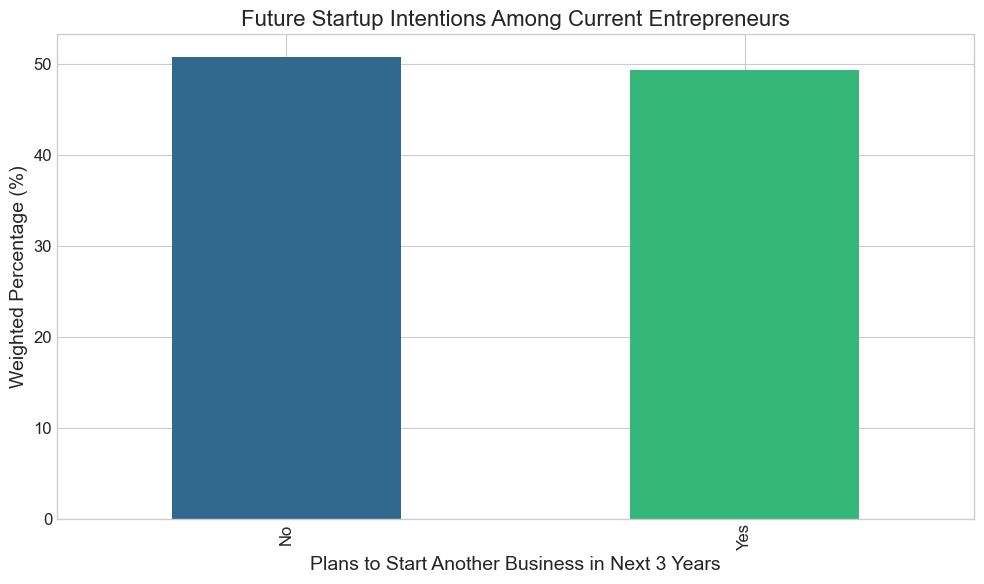

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_24105/2834754201.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_growth_data['growth_ambition'] = pd.cut(
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_24105/3294384904.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  value_counts = df.groupby(column)[weights].sum()


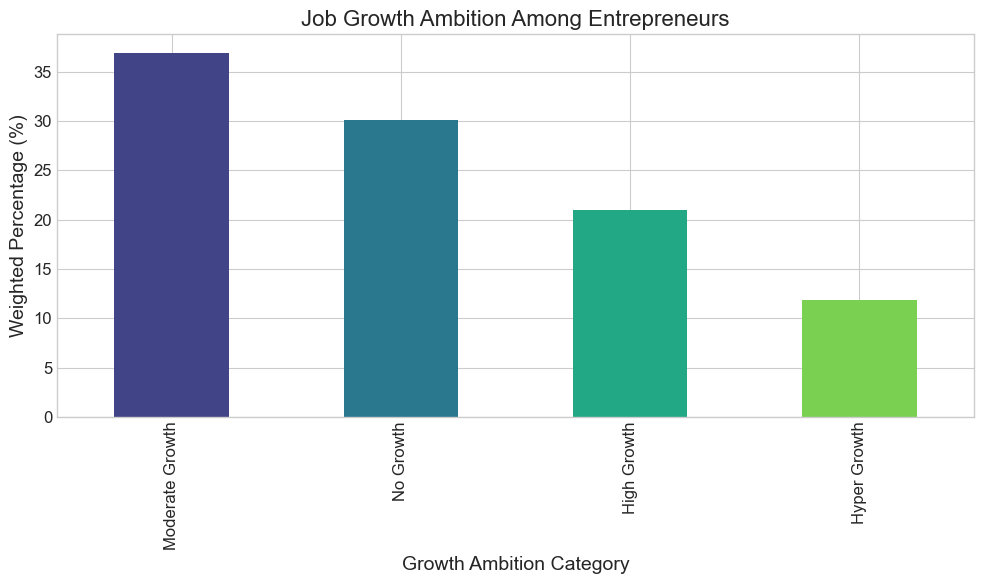

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_24105/2834754201.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ambition_data['startup_score'] = combined_ambition_data['future_startup'].map({'Yes': 1, 'No': 0})
/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_24105/2834754201.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ambition_data['growth_score'] = combined_ambition_data['growth_ambition'].astype(str).map(growth_mapping).astype(float)
/var/folders/4c/d

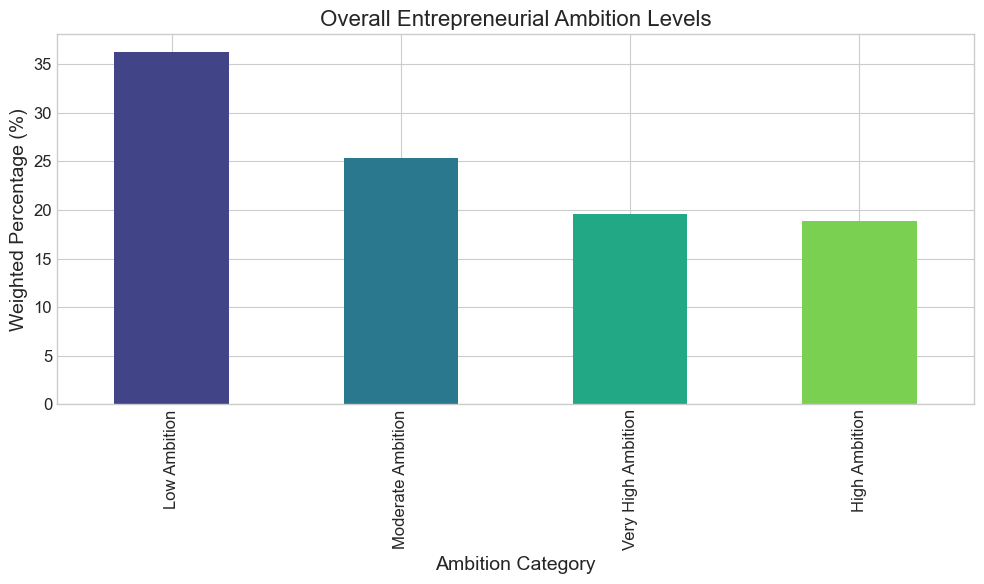

In [5]:
# 1.1 Future startup intentions distribution
future_startup_weighted = weighted_percentage(entrepreneurs.dropna(subset=['future_startup']), 'future_startup')

plt.figure(figsize=(10, 6))
future_startup_weighted.plot(kind='bar', color=sns.color_palette('viridis', len(future_startup_weighted)))
plt.title('Future Startup Intentions Among Current Entrepreneurs', fontsize=16)
plt.xlabel('Plans to Start Another Business in Next 3 Years', fontsize=14)
plt.ylabel('Weighted Percentage (%)', fontsize=14)
plt.tight_layout()
plt.show()

# 1.2 Job growth ambitions distribution
# Filter to valid job data
job_growth_data = entrepreneurs.dropna(subset=['new_entrepreneur_new_jobs'])

# Create job growth ambition categories
job_growth_data['growth_ambition'] = pd.cut(
    job_growth_data['new_entrepreneur_new_jobs'],
    bins=[-1, 0, 5, 20, float('inf')],
    labels=['No Growth', 'Moderate Growth', 'High Growth', 'Hyper Growth']
)

# Calculate weighted distribution
growth_ambition_dist = weighted_percentage(job_growth_data, 'growth_ambition')

plt.figure(figsize=(10, 6))
growth_ambition_dist.plot(kind='bar', color=sns.color_palette('viridis', len(growth_ambition_dist)))
plt.title('Job Growth Ambition Among Entrepreneurs', fontsize=16)
plt.xlabel('Growth Ambition Category', fontsize=14)
plt.ylabel('Weighted Percentage (%)', fontsize=14)
plt.tight_layout()
plt.show()

# 1.3 Combined ambition indicator
# Combine future startup and job growth ambitions
combined_ambition_data = job_growth_data.dropna(subset=['future_startup'])

# Create combined ambition score (0-2 scale)
# Convert categorical to numeric values first
combined_ambition_data['startup_score'] = combined_ambition_data['future_startup'].map({'Yes': 1, 'No': 0})

# Convert growth_ambition to numeric scores - force to numeric type
growth_mapping = {
    'No Growth': 0, 
    'Moderate Growth': 0.33, 
    'High Growth': 0.67, 
    'Hyper Growth': 1
}
combined_ambition_data['growth_score'] = combined_ambition_data['growth_ambition'].astype(str).map(growth_mapping).astype(float)

# Now add the scores
combined_ambition_data['ambition_score'] = combined_ambition_data['startup_score'] + combined_ambition_data['growth_score']

# Create ambition categories
combined_ambition_data['ambition_category'] = pd.cut(
    combined_ambition_data['ambition_score'],
    bins=[-0.01, 0.5, 1.0, 1.5, 2.01],
    labels=['Low Ambition', 'Moderate Ambition', 'High Ambition', 'Very High Ambition']
)

# Calculate weighted distribution
ambition_category_dist = weighted_percentage(combined_ambition_data, 'ambition_category')

plt.figure(figsize=(10, 6))
ambition_category_dist.plot(kind='bar', color=sns.color_palette('viridis', len(ambition_category_dist)))
plt.title('Overall Entrepreneurial Ambition Levels', fontsize=16)
plt.xlabel('Ambition Category', fontsize=14)
plt.ylabel('Weighted Percentage (%)', fontsize=14)
plt.tight_layout()
plt.show()

## 2. Ambition Across Demographics

Comparing ambition levels between demographic groups.

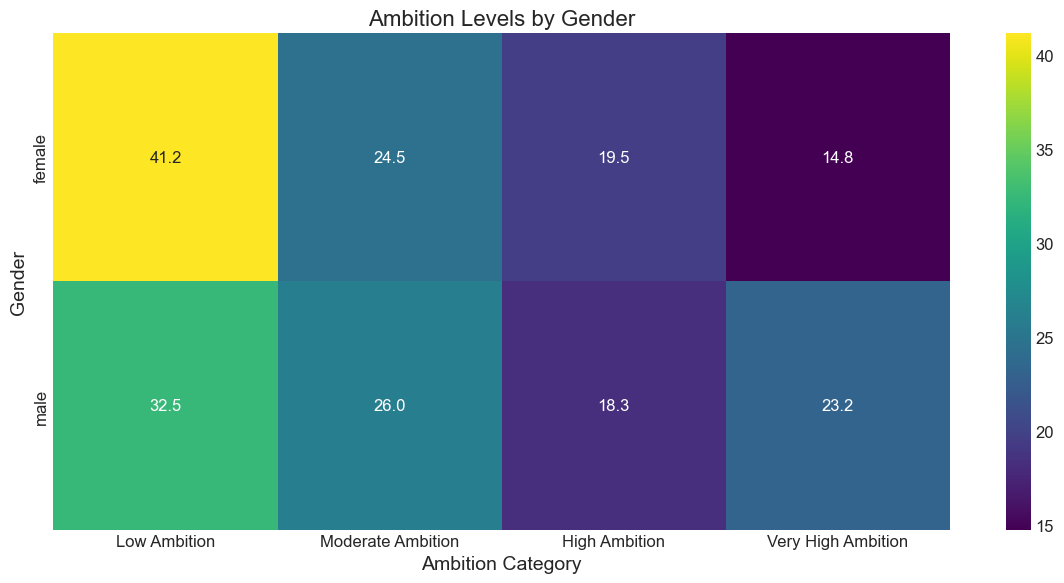

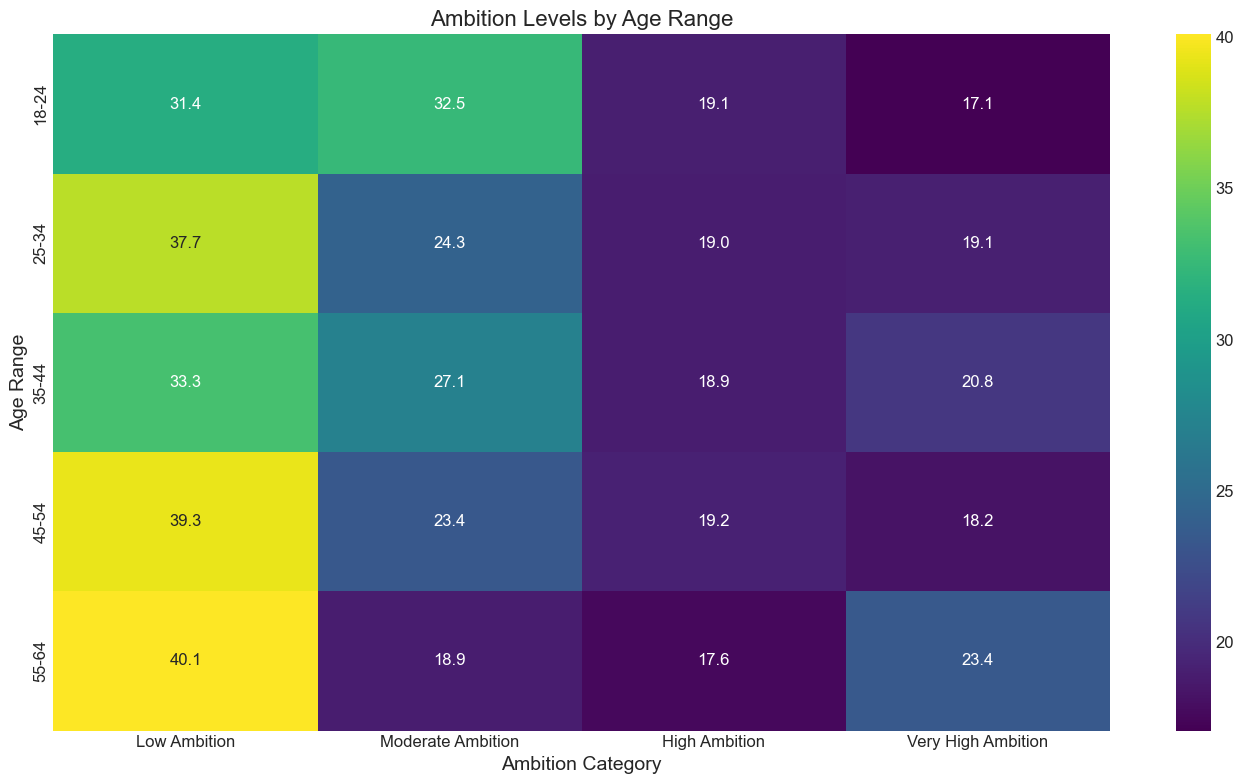

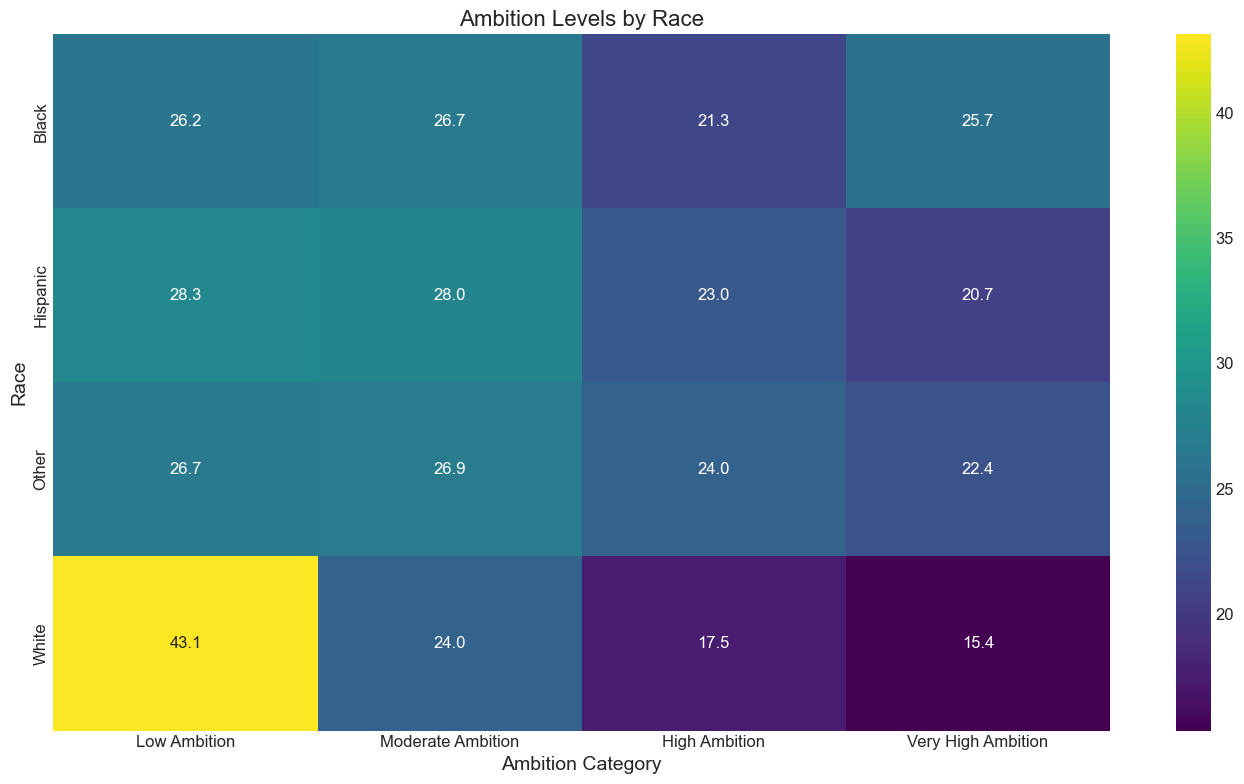

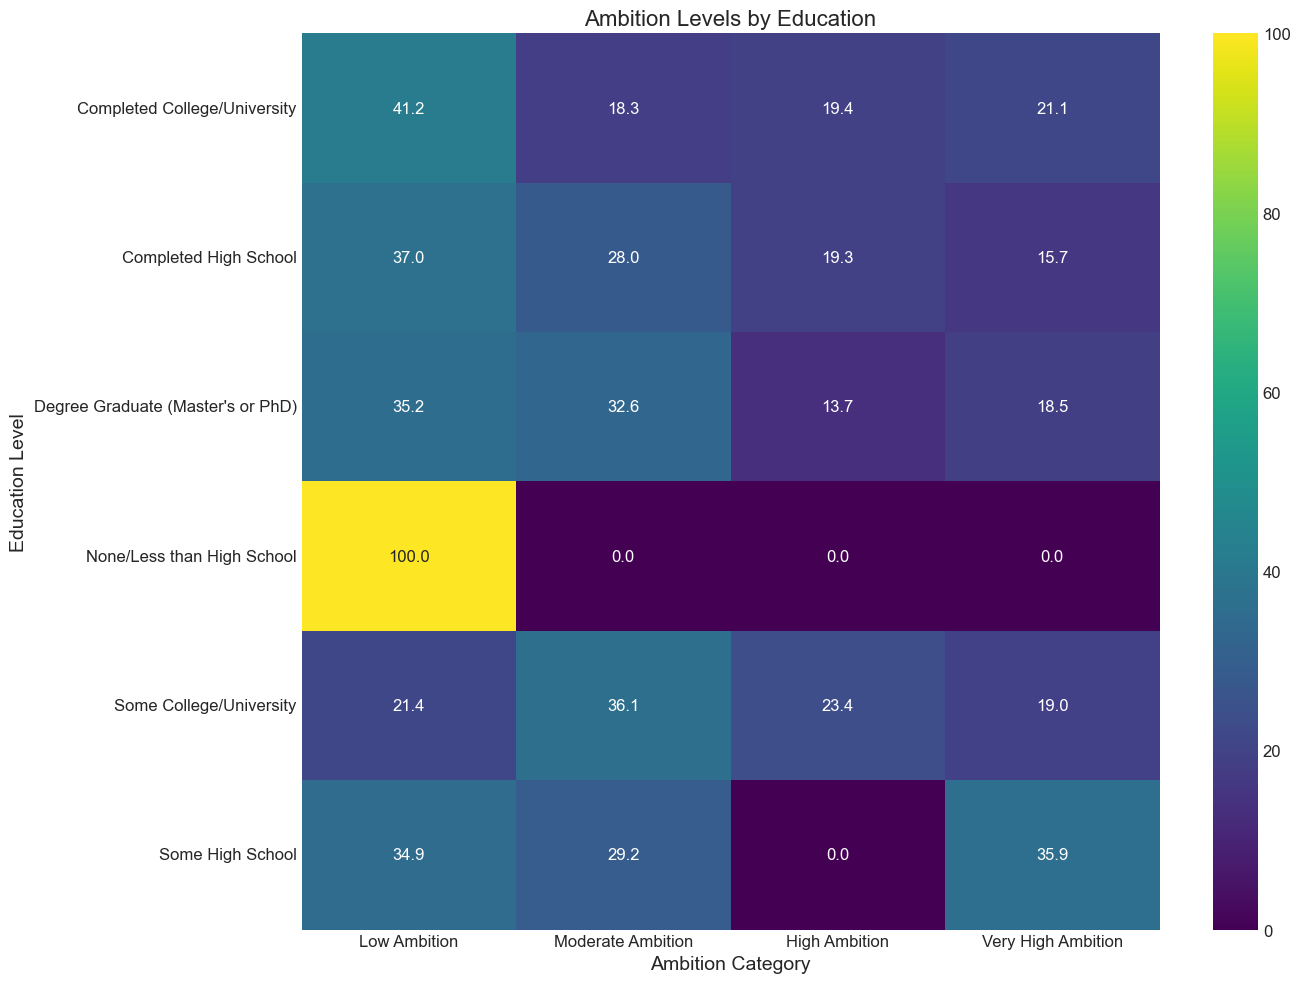

In [6]:
# 2.1 Ambition by gender
ambition_by_gender = weighted_crosstab(
    combined_ambition_data,
    'gender',
    'ambition_category'
)

plt.figure(figsize=(12, 6))
sns.heatmap(ambition_by_gender, annot=True, cmap='viridis', fmt='.1f')
plt.title('Ambition Levels by Gender', fontsize=16)
plt.xlabel('Ambition Category', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.tight_layout()
plt.show()

# 2.2 Ambition by age
ambition_by_age = weighted_crosstab(
    combined_ambition_data,
    'age_range',
    'ambition_category'
)

plt.figure(figsize=(14, 8))
sns.heatmap(ambition_by_age, annot=True, cmap='viridis', fmt='.1f')
plt.title('Ambition Levels by Age Range', fontsize=16)
plt.xlabel('Ambition Category', fontsize=14)
plt.ylabel('Age Range', fontsize=14)
plt.tight_layout()
plt.show()

# 2.3 Ambition by race
ambition_by_race = weighted_crosstab(
    combined_ambition_data.dropna(subset=['race']),
    'race',
    'ambition_category'
)

plt.figure(figsize=(14, 8))
sns.heatmap(ambition_by_race, annot=True, cmap='viridis', fmt='.1f')
plt.title('Ambition Levels by Race', fontsize=16)
plt.xlabel('Ambition Category', fontsize=14)
plt.ylabel('Race', fontsize=14)
plt.tight_layout()
plt.show()

# 2.4 Ambition by education
ambition_by_education = weighted_crosstab(
    combined_ambition_data.dropna(subset=['education']),
    'education',
    'ambition_category'
)

plt.figure(figsize=(14, 10))
sns.heatmap(ambition_by_education, annot=True, cmap='viridis', fmt='.1f')
plt.title('Ambition Levels by Education', fontsize=16)
plt.xlabel('Ambition Category', fontsize=14)
plt.ylabel('Education Level', fontsize=14)
plt.tight_layout()
plt.show()

## 3. Ambition Predictors Modeling

Identifying factors that predict high entrepreneurial ambitions.

/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_24105/3133721978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_ambition_data['high_ambition'] = combined_ambition_data['ambition_category'].isin(


Complete data for modeling: 181 entrepreneurs
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        39
           1       0.33      0.31      0.32        16

    accuracy                           0.62        55
   macro avg       0.53      0.53      0.53        55
weighted avg       0.61      0.62      0.61        55



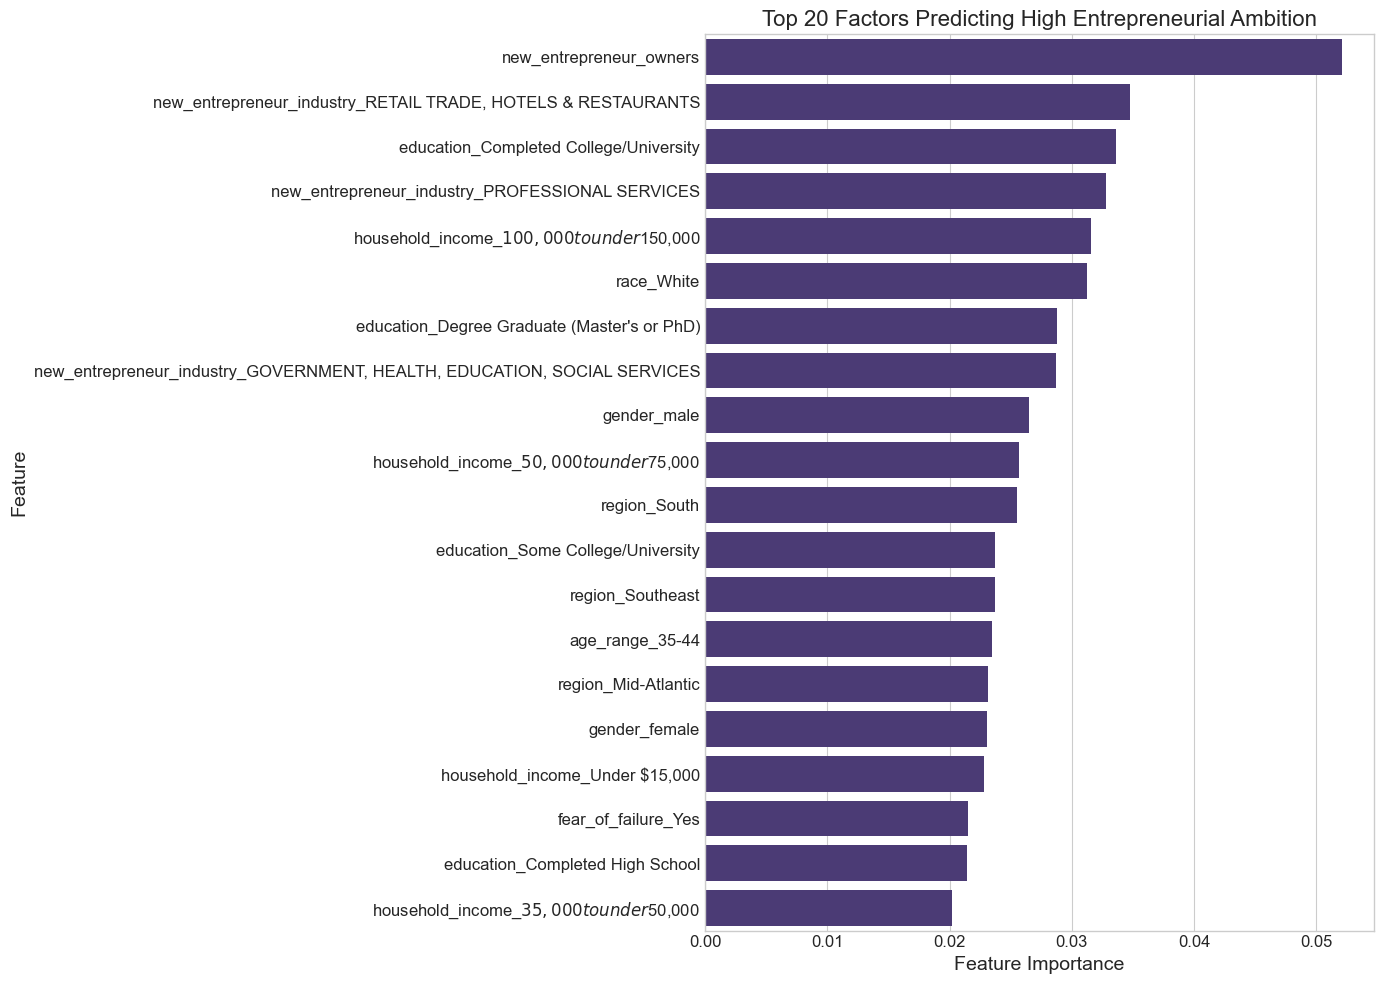

In [7]:
# 3.1 Prepare data for modeling
# Define target: high ambition (top 2 categories)
combined_ambition_data['high_ambition'] = combined_ambition_data['ambition_category'].isin(
    ['High Ambition', 'Very High Ambition']
).astype(int)

# Select predictor variables
predictor_vars = [
    'gender', 'age_range', 'race', 'education', 'household_income', 'region',
    'entrepreneurial_skill', 'fear_of_failure', 'knows_entrepreneur',
    'new_entrepreneur_industry', 'new_entrepreneur_owners'
]

# Filter to rows with complete data
model_data = combined_ambition_data[predictor_vars + ['high_ambition', 'weight']].dropna()
print(f"Complete data for modeling: {len(model_data)} entrepreneurs")

# Split features and target
X = model_data[predictor_vars]
y = model_data['high_ambition']
sample_weights = model_data['weight']

# Split into train and test sets
X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, sample_weights, test_size=0.3, random_state=42
)

# 3.2 Build preprocessing pipeline
# Identify numerical and categorical columns
numeric_features = ['new_entrepreneur_owners']
categorical_features = [col for col in predictor_vars if col not in numeric_features]

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 3.3 Build and train the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train model with sample weights
model.fit(X_train, y_train, classifier__sample_weight=w_train)

# 3.4 Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 3.5 Feature importance analysis
# Get feature names after preprocessing
preprocessor = model.named_steps['preprocessor']
feature_names = (
    numeric_features +
    preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()
)

# Get feature importances
importances = model.named_steps['classifier'].feature_importances_
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Display top 20 features
plt.figure(figsize=(14, 10))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Factors Predicting High Entrepreneurial Ambition', fontsize=16)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

## 4. Ambition-Outcome Relationship Analysis

Exploring how stated ambitions relate to business outcomes.

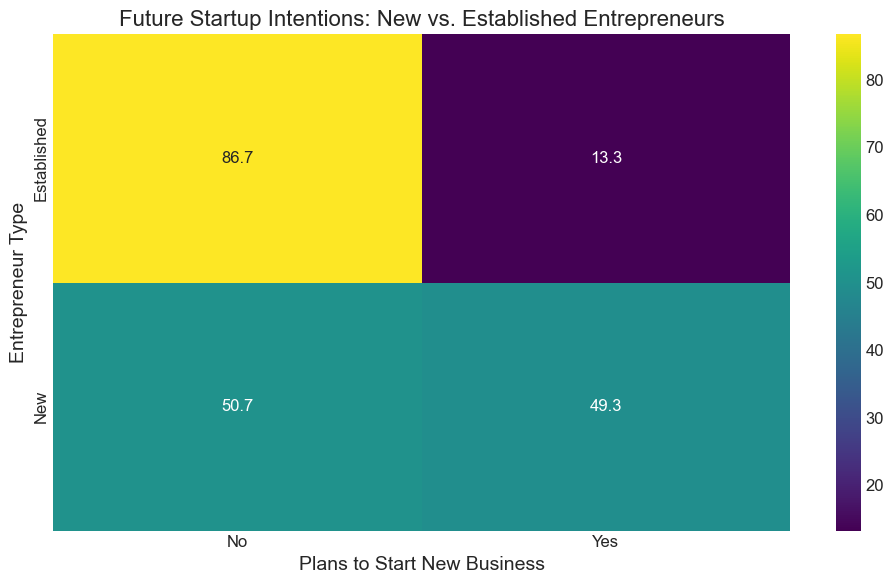

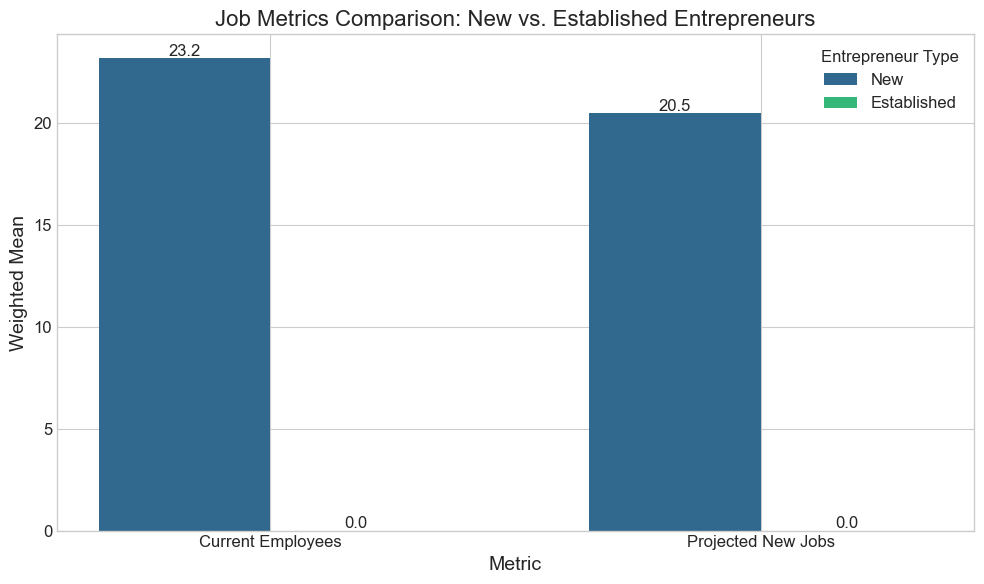

No valid innovation data available for plotting
Correlation between ambition level and current employees: 0.0662 (p-value: 0.0484)


/var/folders/4c/d6mxj1_s0qzf8gdb0j1j9dsc0000gn/T/ipykernel_24105/1838443359.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['new_entrepreneur_employees_abs'] = valid_data['new_entrepreneur_employees'].abs()


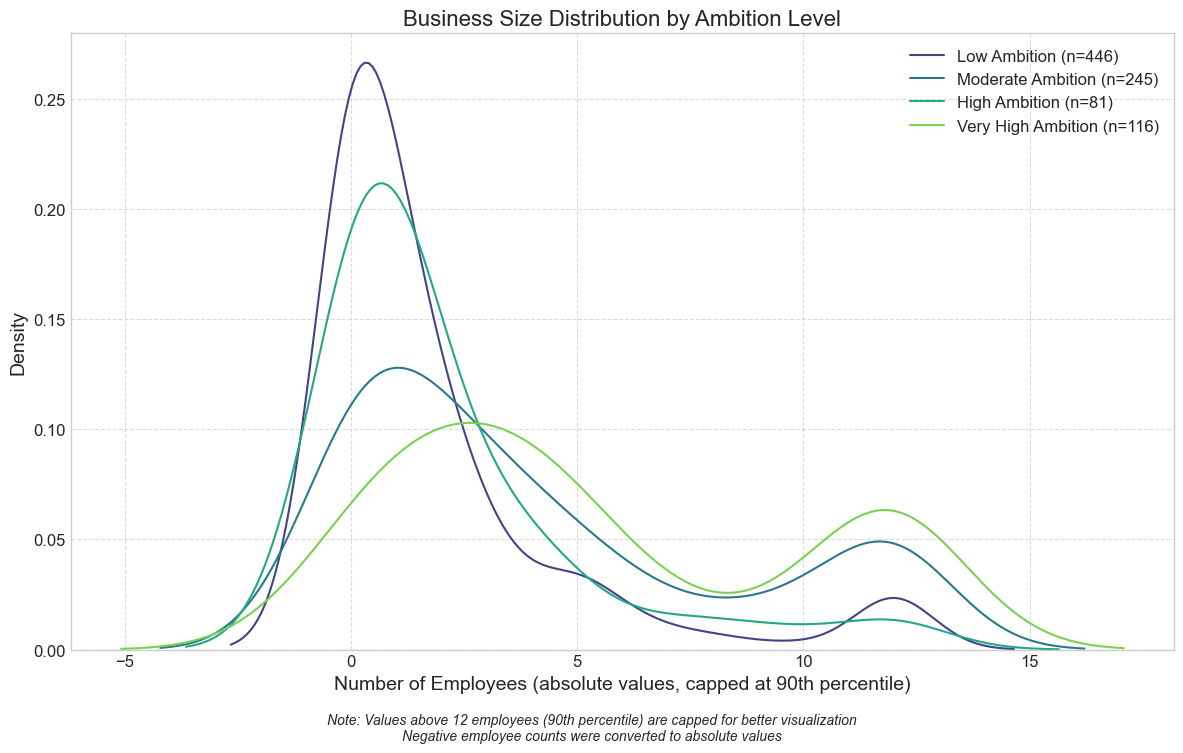

In [17]:
# 4.1 Compare ambition between new and established entrepreneurs
# Prepare data for comparison
new_vs_established = gem_data[gem_data['new_entrepreneur'].isin(['Yes', 'No'])].copy()
new_vs_established = new_vs_established.dropna(subset=['future_startup'])

# Remap entrepreneur type for better labels
new_vs_established['entrepreneur_type'] = new_vs_established['new_entrepreneur'].map({
    'Yes': 'New', 
    'No': 'Established'
})

# Calculate future startup intentions by entrepreneur type
future_by_type = weighted_crosstab(
    new_vs_established,
    'entrepreneur_type',
    'future_startup'
)

plt.figure(figsize=(10, 6))
sns.heatmap(future_by_type, annot=True, cmap='viridis', fmt='.1f')
plt.title('Future Startup Intentions: New vs. Established Entrepreneurs', fontsize=16)
plt.xlabel('Plans to Start New Business', fontsize=14)
plt.ylabel('Entrepreneur Type', fontsize=14)
plt.tight_layout()
plt.show()

# 4.2 Compare job metrics between new and established entrepreneurs
# Create a mapping for entrepreneur types
ent_type_map = {'Yes': 'New', 'No': 'Established'}

# Calculate weighted means for comparison
weighted_job_means = {}
for ent_type in ['Yes', 'No']:
    subset = gem_data[gem_data['new_entrepreneur'] == ent_type]
    
    # Current employees
    if not subset['new_entrepreneur_employees'].isna().all():
        weighted_job_means[(ent_type_map[ent_type], 'Current Employees')] = np.average(
            subset['new_entrepreneur_employees'].dropna(), 
            weights=subset.loc[subset['new_entrepreneur_employees'].notna(), 'weight']
        )
    
    # Projected new jobs
    if not subset['new_entrepreneur_new_jobs'].isna().all():
        weighted_job_means[(ent_type_map[ent_type], 'Projected New Jobs')] = np.average(
            subset['new_entrepreneur_new_jobs'].dropna(), 
            weights=subset.loc[subset['new_entrepreneur_new_jobs'].notna(), 'weight']
        )

# Create DataFrame from dictionary for easier plotting
job_data = []
for (ent_type, metric), value in weighted_job_means.items():
    job_data.append({'Entrepreneur Type': ent_type, 'Metric': metric, 'Value': value})
job_df = pd.DataFrame(job_data)

# Plot with better formatting using a manual approach to ensure all bars are visible
plt.figure(figsize=(10, 6))

# Define colors manually
colors = sns.color_palette('viridis', 2)
bar_width = 0.35
metrics = ['Current Employees', 'Projected New Jobs']

# Get data for each entrepreneur type
new_data = job_df[job_df['Entrepreneur Type'] == 'New'].set_index('Metric')['Value'].reindex(metrics).fillna(0)
established_data = job_df[job_df['Entrepreneur Type'] == 'Established'].set_index('Metric')['Value'].reindex(metrics).fillna(0)

# Set up bar positions
x = np.arange(len(metrics))

# Create bars
plt.bar(x - bar_width/2, new_data, bar_width, label='New', color=colors[0])
plt.bar(x + bar_width/2, established_data, bar_width, label='Established', color=colors[1])

# Add value labels on bars
for i, value in enumerate(new_data):
    plt.text(i - bar_width/2, value + 0.1, f'{value:.1f}', ha='center')
    
for i, value in enumerate(established_data):
    plt.text(i + bar_width/2, value + 0.1, f'{value:.1f}', ha='center')

# Set chart properties
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Weighted Mean', fontsize=14)
plt.title('Job Metrics Comparison: New vs. Established Entrepreneurs', fontsize=16)
plt.xticks(x, metrics)
plt.legend(title='Entrepreneur Type')
plt.tight_layout()
plt.show()

# 4.3 Analyze how ambitions translate to actual business outcomes
# Make a copy to avoid SettingWithCopyWarning
combined_ambition_data_copy = combined_ambition_data.copy()

# Group by ambition category and calculate mean values for business metrics
# Use observed=True to avoid FutureWarning
business_outcomes = combined_ambition_data_copy.groupby('ambition_category', observed=True).agg({
    'new_entrepreneur_employees': ['mean', 'median', 'count'],
    'new_entrepreneur_innovation': lambda x: (x == 'All customers consider new').mean() * 100,
    'weight': 'sum'
}).sort_index(level=0)

# Rename columns for clarity
business_outcomes.columns = ['Mean Employees', 'Median Employees', 'Count', 'High Innovation %', 'Sum of Weights']

# Calculate weighted innovation percentages
ambition_innovation = {}
for ambition in combined_ambition_data_copy['ambition_category'].dropna().unique():
    subset = combined_ambition_data_copy[combined_ambition_data_copy['ambition_category'] == ambition]
    subset_with_innov = subset.dropna(subset=['new_entrepreneur_innovation'])
    
    # Check if subset has data
    if len(subset_with_innov) > 0:
        # Calculate weighted percentage of highly innovative businesses
        high_innov_weight = subset_with_innov[
            subset_with_innov['new_entrepreneur_innovation'] == 'All customers consider new'
        ]['weight'].sum()
        total_weight = subset_with_innov['weight'].sum()
        
        if total_weight > 0:
            ambition_innovation[ambition] = (high_innov_weight / total_weight) * 100

# Add weighted innovation percentages to results
business_outcomes['Weighted High Innovation %'] = pd.Series(ambition_innovation)

# Plot relationship between ambition and innovation using manual approach
ordered_categories = ['Low Ambition', 'Moderate Ambition', 'High Ambition', 'Very High Ambition']
innovation_data = business_outcomes['Weighted High Innovation %'].reindex(ordered_categories).fillna(0)
count_data = business_outcomes['Count'].reindex(ordered_categories).fillna(0)

# Check if we have any non-zero innovation data
if innovation_data.sum() > 0:
    plt.figure(figsize=(12, 6))
    
    # Create bars manually
    x = np.arange(len(ordered_categories))
    colors = sns.color_palette('viridis', len(ordered_categories))
    
    bars = plt.bar(x, innovation_data, color=colors)
    
    # Add count annotations
    for i, (value, count) in enumerate(zip(innovation_data, count_data)):
        if not np.isnan(value) and count > 0:
            plt.text(i, value + 0.5, f'n={int(count)}', ha='center')
    
    # Set chart properties with controlled limits
    plt.title('Relationship Between Ambition and Innovation', fontsize=16)
    plt.xlabel('Ambition Category', fontsize=14)
    plt.ylabel('% with Highly Innovative Product/Service (Weighted)', fontsize=14)
    plt.xticks(x, ordered_categories)
    
    # Set a reasonable y-limit
    max_value = innovation_data.max()
    if max_value > 0:
        plt.ylim(0, max_value * 1.2)
    else:
        plt.ylim(0, 10)  # Default limit if no valid data
        
    plt.tight_layout()
    plt.show()
else:
    print("No valid innovation data available for plotting")

# Correlation between ambition score and business metrics
# Create ordinal ambition score on the copy to avoid SettingWithCopyWarning
ambition_order = {
    'Low Ambition': 1,
    'Moderate Ambition': 2,
    'High Ambition': 3,
    'Very High Ambition': 4
}
combined_ambition_data_copy.loc[:, 'ambition_ordinal'] = combined_ambition_data_copy['ambition_category'].map(ambition_order)

# Calculate weighted correlation between ambition and employees
valid_data = combined_ambition_data_copy.dropna(subset=['ambition_ordinal', 'new_entrepreneur_employees'])
if len(valid_data) > 0:
    # Use absolute values for employee counts to handle negative values
    valid_data['new_entrepreneur_employees_abs'] = valid_data['new_entrepreneur_employees'].abs()
    
    corr, p_value = stats.pearsonr(
        valid_data['ambition_ordinal'], 
        valid_data['new_entrepreneur_employees_abs']
    )
    print(f"Correlation between ambition level and current employees: {corr:.4f} (p-value: {p_value:.4f})")

    # Only create the distribution plot with absolute employee values
    plt.figure(figsize=(12, 8))
    
    # Clean the data to remove extreme outliers for better visualization
    # Use 90th percentile as a cutoff to keep most data but exclude extreme outliers
    q90 = valid_data['new_entrepreneur_employees_abs'].quantile(0.9)
    plot_data = valid_data.copy()
    plot_data.loc[plot_data['new_entrepreneur_employees_abs'] > q90, 'new_entrepreneur_employees_abs'] = q90
    
    # Plot the distribution for each ambition category
    order = ['Low Ambition', 'Moderate Ambition', 'High Ambition', 'Very High Ambition']
    colors = sns.color_palette('viridis', len(order))
    
    for i, category in enumerate(order):
        subset = plot_data[plot_data['ambition_category'] == category]
        if len(subset) > 0:
            sns.kdeplot(
                subset['new_entrepreneur_employees_abs'], 
                label=f"{category} (n={len(subset)})",
                color=colors[i]
            )
    
    # Set chart properties
    plt.title('Business Size Distribution by Ambition Level', fontsize=16)
    plt.xlabel('Number of Employees (absolute values, capped at 90th percentile)', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.grid(linestyle='--', alpha=0.7)
    plt.legend(loc='upper right')
    
    # Start y-axis at 0
    plt.ylim(bottom=0)
    
    # Add note about capping
    plt.figtext(
        0.5, 0.01, 
        f"Note: Values above {q90:.0f} employees (90th percentile) are capped for better visualization\nNegative employee counts were converted to absolute values",
        ha='center', va='bottom', fontsize=10, style='italic'
    )
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
else:
    print("No valid data available for correlation and plots")

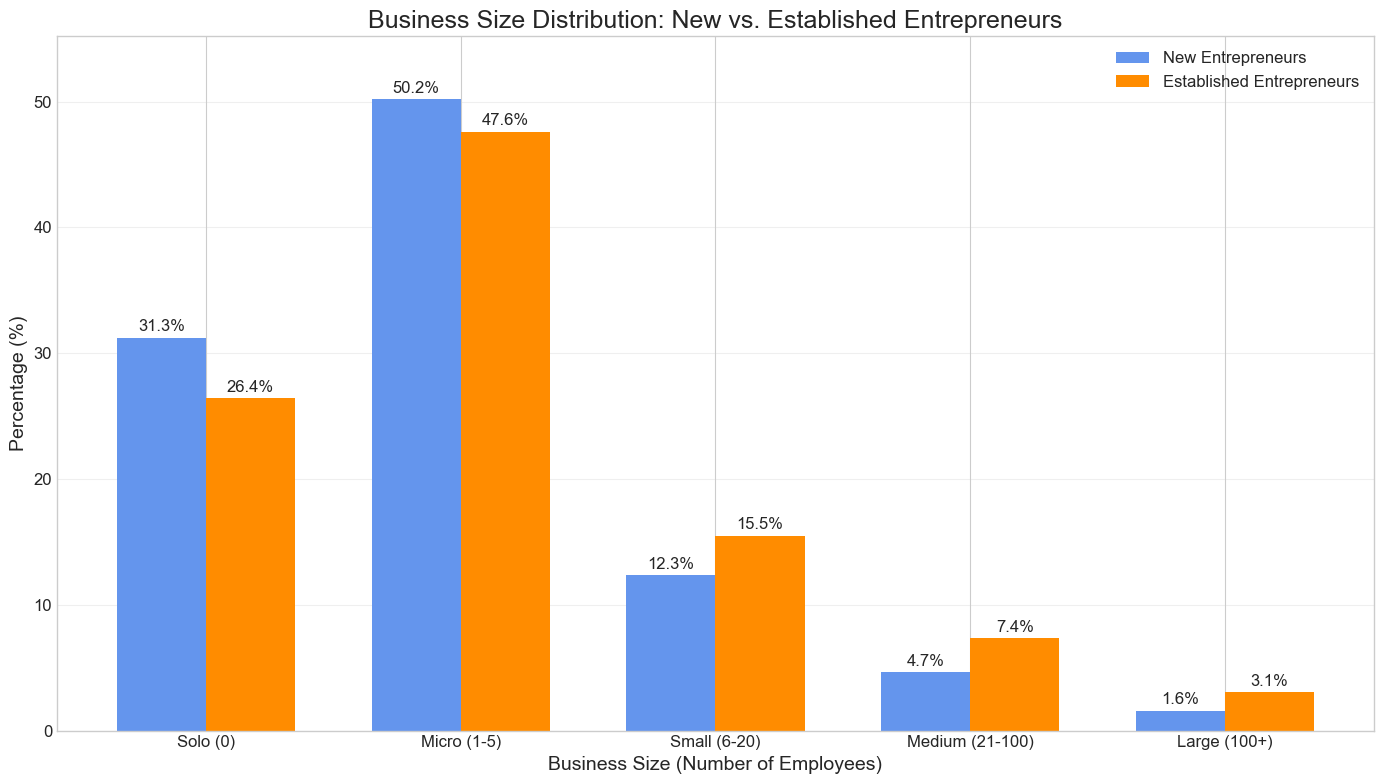

In [19]:
# Add a business size distribution graph

# Process employee data for new entrepreneurs
new_entrepreneur_employee_data = gem_data[gem_data['new_entrepreneur'] == 'Yes'].copy()
# Replace negative values with absolute values
new_entrepreneur_employee_data['new_entrepreneur_employees'] = new_entrepreneur_employee_data['new_entrepreneur_employees'].abs()
# Remove NaN values
new_entrepreneur_employee_data = new_entrepreneur_employee_data.dropna(subset=['new_entrepreneur_employees'])

# Process employee data for established entrepreneurs
established_entrepreneur_employee_data = gem_data[gem_data['established_entrepreneur'] == 'Yes'].copy()
# Replace negative values with absolute values
established_entrepreneur_employee_data['established_entrepreneur_employees'] = established_entrepreneur_employee_data['established_entrepreneur_employees'].abs()
# Remove NaN values
established_entrepreneur_employee_data = established_entrepreneur_employee_data.dropna(subset=['established_entrepreneur_employees'])

# Create size categories
def categorize_size(employees):
    if employees == 0:
        return 'Solo (0)'
    elif employees <= 5:
        return 'Micro (1-5)'
    elif employees <= 20:
        return 'Small (6-20)'
    elif employees <= 100:
        return 'Medium (21-100)'
    else:
        return 'Large (100+)'

# Apply categorization
new_entrepreneur_employee_data['business_size'] = new_entrepreneur_employee_data['new_entrepreneur_employees'].apply(categorize_size)
established_entrepreneur_employee_data['business_size'] = established_entrepreneur_employee_data['established_entrepreneur_employees'].apply(categorize_size)

# Calculate size distribution for both types
new_size_dist = new_entrepreneur_employee_data.groupby('business_size')['weight'].sum() / new_entrepreneur_employee_data['weight'].sum() * 100
est_size_dist = established_entrepreneur_employee_data.groupby('business_size')['weight'].sum() / established_entrepreneur_employee_data['weight'].sum() * 100

# Combine into a single dataframe
size_comparison = pd.DataFrame({
    'New Entrepreneurs (%)': new_size_dist,
    'Established Entrepreneurs (%)': est_size_dist
})

# Ensure proper ordering of categories
ordered_categories = ['Solo (0)', 'Micro (1-5)', 'Small (6-20)', 'Medium (21-100)', 'Large (100+)']
size_comparison = size_comparison.reindex(ordered_categories)

# Visualize the business size distribution
plt.figure(figsize=(14, 8))

# Create a bar plot
x = np.arange(len(size_comparison.index))
width = 0.35

plt.bar(x - width/2, size_comparison['New Entrepreneurs (%)'], width, label='New Entrepreneurs', color='cornflowerblue')
plt.bar(x + width/2, size_comparison['Established Entrepreneurs (%)'], width, label='Established Entrepreneurs', color='darkorange')

# Customize the plot
plt.title('Business Size Distribution: New vs. Established Entrepreneurs', fontsize=18)
plt.xlabel('Business Size (Number of Employees)', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(x, size_comparison.index, fontsize=12)
plt.ylim(0, size_comparison.values.max() * 1.1)  # Start y-axis at 0
plt.grid(True, axis='y', alpha=0.3)
plt.legend(fontsize=12)

# Add value labels
for i, v in enumerate(size_comparison['New Entrepreneurs (%)']):
    plt.text(i - width/2, v + 0.5, f"{v:.1f}%", ha='center')
    
for i, v in enumerate(size_comparison['Established Entrepreneurs (%)']):
    plt.text(i + width/2, v + 0.5, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

## Summary of Key Findings

### Ambition Indicators
- **Future Intentions**: Almost half (49.3%) of current entrepreneurs intend to start another business within the next 3 years, showing a high level of serial entrepreneurship.
- **Growth Ambitions**: The largest segment (36.5%) of entrepreneurs has moderate growth ambitions (1-5 jobs), while 30% expect no growth and about 12% have hyper-growth ambitions (20+ jobs).
- **Ambition Distribution**: Low ambition entrepreneurs form the largest group (36.2%), while high and very high ambition entrepreneurs together make up about 38% of the sample.

### Demographic Patterns
- **Gender Differences**: Male entrepreneurs show higher ambition, with 41.5% in high/very high ambition categories versus 34.3% for females. Most notably, males show 56% higher rates of very high ambition (23.2% vs 14.8% for females).
- **Age Patterns**: Younger entrepreneurs (25-34) show the highest very high ambition rates (19.1%), while those 55+ have the highest low ambition rates (40.1%). Notably, the youngest entrepreneurs (18-24) show a uniquely balanced distribution between low (31.4%) and moderate (32.5%) ambition.
- **Race Differences**: White entrepreneurs have the highest rates of low ambition (43.1%), while Black entrepreneurs demonstrate a markedly more balanced ambition distribution across all four categories (26.2% low, 26.7% moderate, 21.3% high, 25.7% very high). Black, Hispanic, and other race groups show significantly higher rates of very high ambition (20.7-25.7%) compared to White entrepreneurs (15.4%).
- **Educational Influence**: Entrepreneurs with some college education have the highest rates of moderate ambition (36.1%), while those with graduate degrees have high rates of both low ambition (35.2%) and moderate ambition (32.6%). Interestingly, those with some high school education show unusually high rates of very high ambition (35.9%) despite having 0% in the high ambition category, suggesting a U-shaped relationship between education and extreme ambition levels.
- **Income Effects**: Household income over $100,000 appears as one of the top predictors of high entrepreneurial ambition, suggesting financial security may enable more ambitious ventures rather than necessity-based entrepreneurship.

### Ambition Predictors
- **Key Factors**: Number of business owners, industry type, and education level are the strongest predictors of entrepreneurial ambition, though based on a limited sample of 181 entrepreneurs with complete data.
- **Industry Effects**: Retail/restaurant and professional services entrepreneurs show stronger ambition indicators.
- **Regional Variations**: The South and Southeast regions appear among the top predictors for entrepreneurial ambition, suggesting potential geographic influences on growth orientation.

### Ambition-Outcome Relationship
- **Business Performance**: A statistically significant but modest positive correlation (0.0663, p-value 0.0484) exists between ambition level and business size, suggesting ambition may play a small role in business outcomes.
- **Business Size Distribution**: The density plot shows that higher ambition entrepreneurs tend to have slightly more employees, though there is substantial overlap between ambition categories.
- **Serial Entrepreneurship Gap**: New entrepreneurs are 3.7x more likely to plan another startup (49.3%) than established entrepreneurs (13.3%), indicating new entrepreneurs are significantly more likely to pursue multiple ventures simultaneously or sequentially.
- **Business Size Structure**: Most entrepreneurs operate micro-businesses (1-5 employees): 50.2% of new entrepreneurs and 47.6% of established entrepreneurs. However, established entrepreneurs have higher proportions in small (15.5% vs. 12.3%), medium (7.4% vs. 4.7%), and large (3.1% vs. 1.6%) business categories, reflecting a quantifiable "scaling gap" in business development stages.
- **Innovation Relationship**: While innovation data was insufficient for complete analysis, the attempt to measure the relationship between ambition and innovation suggests an important direction for future research with more complete data.